In [1]:
import pandas as pd
from tqdm import tqdm
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from dataset_helper import get_mnist_data

import sys
sys.path.append('../mlrose')
from mlrose_hiive import NeuralNetwork

In [2]:
X, y, y_one_hot = get_mnist_data()

In [3]:
# Split data into training and test sets
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=True)
train_index, test_index = list(skf.split(X, y))[0]
X_train = X[train_index]
X_test = X[test_index]
y_train = y[train_index]
y_test = y[test_index]
y_train_one_hot = y_one_hot[train_index]
y_test_one_hot = y_one_hot[test_index]

In [4]:
X_train.shape

(666, 784)

In [63]:
nn_model = NeuralNetwork(
    hidden_nodes = [10], activation ='relu', 
    algorithm='gradient_descent', 
    max_iters = 1000, bias = True, is_classifier = True, 
    learning_rate = 0.00000001, early_stopping = True, clip_max = 5, max_attempts = 100, 
    random_state = 1, curve=True)
nn_model.fit(X_train, y_train_one_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[10], learning_rate=1e-08,
              max_attempts=100, max_iters=1000, random_state=1)

In [64]:
nn_model.fit(X_train, y_train_one_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[10], learning_rate=1e-08,
              max_attempts=100, max_iters=1000, random_state=1)

In [65]:
i = 3
nn_model.predict(X_test[i:i+1])
print(nn_model.predicted_probs.shape)
print(nn_model.predicted_probs)

(1, 10)
[[1.19203644e-016 1.11014588e-075 1.49630047e-025 1.23474102e-107
  5.13928950e-023 8.67007619e-045 2.87034878e-028 2.85792116e-049
  5.23125693e-001 4.76874307e-001]]


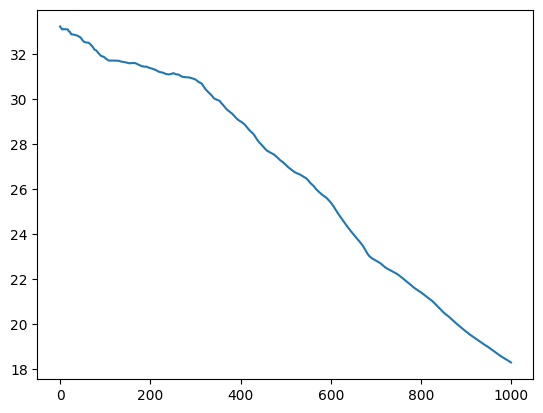

In [66]:
# plt.plot(nn_model.fitness_curve[:, 0])
plt.plot(nn_model.fitness_curve)

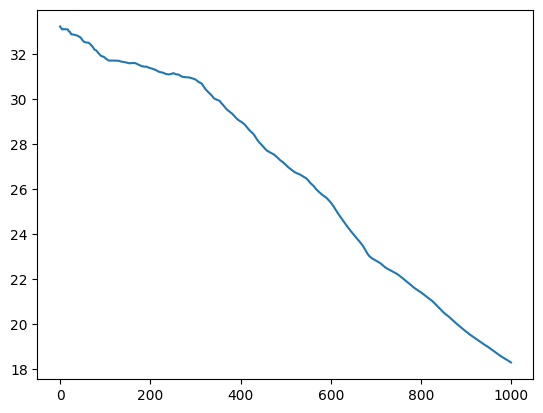

In [67]:
# plt.plot(nn_model.fitness_curve[:, 0])
plt.plot(nn_model.fitness_curve)

In [26]:
nn_model.score(X_test, y_test_one_hot)

0.1467065868263473